## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [29]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [37]:
file = r'./fundamentals.csv'
file2 = r'./securities.csv'
readFun = pd.read_csv(file)
readSec = pd.read_csv(file2)

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

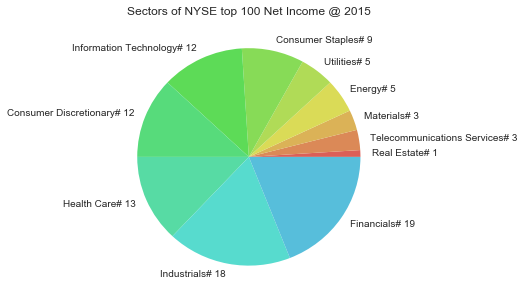

In [38]:
read_ = readFun[['Ticker Symbol','Net Income','For Year']]
read_2 = readSec[['Ticker symbol','GICS Sector']]


# 针对大小写，重命名
read_3 = read_2.rename(columns={'Ticker symbol':'Ticker Symbol'})

# 根据共同的Ticker Symbol合并表   
read_all = pd.merge(read_,read_3,left_on='Ticker Symbol',right_on='Ticker Symbol')

# 拿到指定的列数据
all_ = read_all[read_all['For Year'].isin(['2015.0'])][['Net Income','GICS Sector']]
# Net Income 排序
data_4 =all_.sort_values(by=['Net Income'],ascending = False).head(100)['GICS Sector']

# get num
count_ = Counter(data_4.values.tolist())
cnts = []
secs = []
for x,y in sorted(count_.items(),key=lambda x:x[1]):
    cnts.append(y) #数量
    secs.append(x+'# {}'.format(y))#标签
    
x,ax = plt.subplots(figsize=(5,5))

ax.set_prop_cycle(color=sns.hls_palette(19))

plt.pie(cnts,labels=secs)
plt.title('Sectors of NYSE top 100 Net Income @ 2015')
plt.show()


## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

11.686324287324947
8.871579940239098


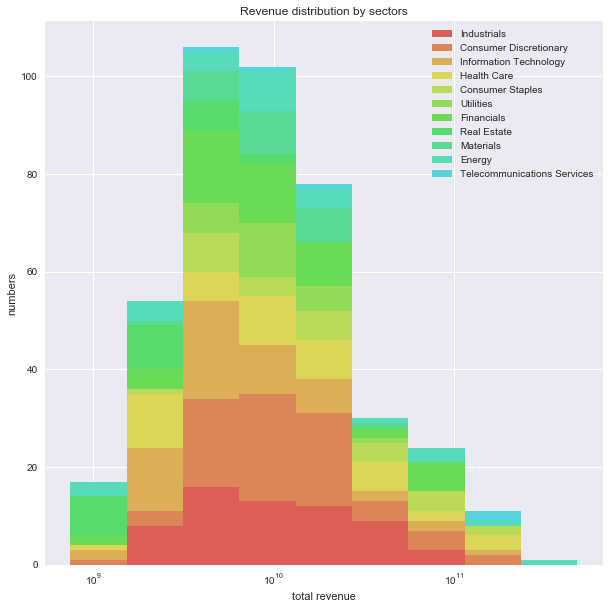

In [49]:
read_two = readFun[['Ticker Symbol','Total Revenue','For Year']]
read_Sec = readSec[['Ticker symbol','GICS Sector']]
# 针对大小写，重命名
read_Sec_3 = read_Sec.rename(columns={'Ticker symbol':'Ticker Symbol'})

# 根据共同的Ticker Symbol合并表   
read_all_ = pd.merge(read_two,read_Sec_3,left_on='Ticker Symbol',right_on='Ticker Symbol')

# 拿到指定的列数据
all__ = read_all_[read_all_['For Year'].isin(['2015.0'])][['Total Revenue','GICS Sector']]
# all__
# 不重复的GICS Sector
sector_name = all_['GICS Sector'].unique()

k,ax= plt.subplots(figsize=(10,10))#大小
ax.set_prop_cycle(color=sns.hls_palette(20))#颜色种类

print(np.log10(all__['Total Revenue'].max()))
print(np.log10(all__['Total Revenue'].min()))

plt.gca().set_xscale('log')
plt.hist([all__[all__['GICS Sector'] == sn]['Total Revenue'] for sn in sector_name],
         bins=np.logspace(np.log10(all__['Total Revenue'].min()),np.log10(all__['Total Revenue'].max()), 10),
         density=False, stacked=True)

plt.title('Revenue distribution by sectors')
plt.legend(sector_name)
plt.xlabel('total revenue')
plt.ylabel('numbers')
plt.show()


## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

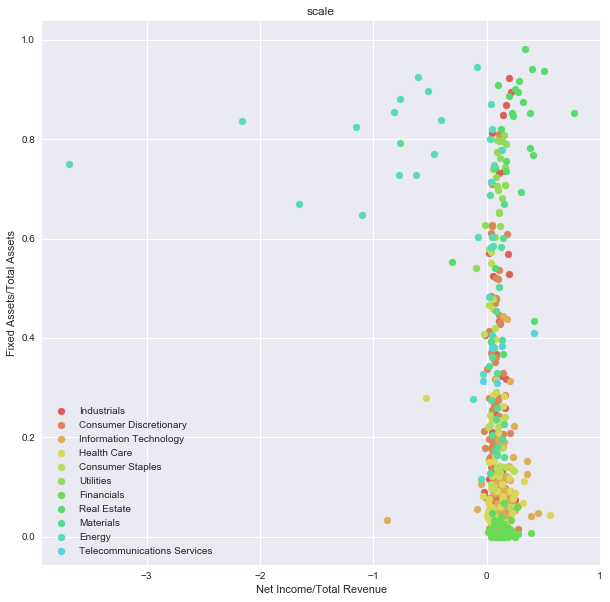

In [53]:
X1 = 'Net Income'
X2 = 'Total Revenue'

Y1 = 'Fixed Assets'
Y2 = 'Total Assets'

read_three = readFun[['Ticker Symbol',X1,X2,Y1,Y2,'For Year']]
read_Sec_ = readSec[['Ticker symbol','GICS Sector']]
# 针对大小写，重命名
read_Sec_4 = read_Sec_.rename(columns={'Ticker symbol':'Ticker Symbol'})

# 根据共同的Ticker Symbol合并表   
read_all1_ = pd.merge(read_three,read_Sec_4,left_on='Ticker Symbol',right_on='Ticker Symbol')

# 拿到指定的列数据
all__1 = read_all1_[read_all1_['For Year'].isin(['2015.0'])]

# 不重复的GICS Sector
sector_name1 = all__1['GICS Sector'].unique()

h,ax = plt.subplots(figsize=(10,10))
ax.set_prop_cycle(color=sns.hls_palette(20))

for sn in sector_name:
    ax.scatter(all__1[all__1['GICS Sector'] == sn][X1] / all__1[all__1['GICS Sector'] == sn][X2], 
               all__1[all__1['GICS Sector'] == sn][Y1] / all__1[all__1['GICS Sector'] == sn][Y2])

plt.title('scale')
plt.legend(sector_name1)
plt.xlabel('{}/{}'.format(X1,X2))
plt.ylabel('{}/{}'.format(Y1,Y2))
plt.show()